In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,197.000000,200.000000
mean,147.042500,23.264000,30.602030,14.022500
std,85.854236,14.846809,21.756988,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.800000,10.375000
50%,149.750000,22.900000,25.900000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
X = df.drop('sales',axis = 1)
y = df['sales']

In [8]:
X.shape, X.head()

((200, 3),
       TV  radio  newspaper
 0  230.1   37.8       69.2
 1   44.5   39.3       45.1
 2   17.2   45.9       69.3
 3  151.5   41.3       58.5
 4  180.8   10.8       58.4)

In [9]:
y.shape, y.head()

((200,),
 0    22.1
 1    10.4
 2     9.3
 3    18.5
 4    12.9
 Name: sales, dtype: float64)

# Convert to arrays

In [11]:
features=np.array(X)

targets=np.array(y).reshape(-1,1)
features [:4,], len(features)

(array([[230.1,  37.8,  69.2],
        [ 44.5,  39.3,  45.1],
        [ 17.2,  45.9,  69.3],
        [151.5,  41.3,  58.5]]),
 200)

In [12]:
targets[:4], len(targets)

(array([[22.1],
        [10.4],
        [ 9.3],
        [18.5]]),
 200)

# normalize feature

In [13]:
def normalize(features):
    """
    features     -   (200, 3)
    features.T   -   (3, 200)

    We transpose the input matrix, swapping
    cols and rows to make vector math easier
    """
    

    for feature in features.T:
        fmean = np.mean(feature)
        frange = np.amax(feature) - np.amin(feature)

        #Vector Subtraction
        feature -= fmean

        #Vector Division
        feature /= frange

    return features

# make predictions

In [15]:
def predict(features, weights):
  """
  features - (200, 3)
  weights - (3, 1)
  predictions - (200,1)
  """
  predictions = np.dot(features, weights)
  return predictions

# compute the cost

In [17]:
def cost_function(features, targets, weights):
    """**
    features:(200,3)
    targets: (200,1)
    weights:(3,1)
    returns average squared error among predictions
    **"""
    N = len(targets)

    predictions = predict(features, weights)

    # Matrix math lets use do this without looping
    sq_error = (predictions - targets)**2
    #print(sq_error.sum())
    # Return average squared error among predictions
    

    return 1.0/(2*N) * sq_error.sum()

# gradient descent

In [19]:
def update_weights(features, targets, weights, learning_rate):
    '''
    Features:(200, 3)
    Targets: (200, 1)
    Weights:(3, 1)
    '''
    predictions = predict(features, weights)

    #Extract our features
    x1 = features[:,0]
    x2 = features[:,1]
    x3 = features[:,2]

    # Use matrix cross product (*) to simultaneously
    # calculate the derivative for each weight
    d_w1 = -x1*(targets - predictions)
    d_w2 = -x2*(targets - predictions)
    d_w3 = -x3*(targets - predictions)

    # Multiply the mean derivative by the learning rate
    # and subtract from our weights (remember gradient points in direction of steepest ASCENT)
    weights[0][0] -= (learning_rate * np.mean(d_w1))
    weights[1][0] -= (learning_rate * np.mean(d_w2))
    weights[2][0] -= (learning_rate * np.mean(d_w3))

    return weights

# Vectorization

In [20]:
def update_weights_vectorized(features, targets, weights, learning_rate):
    """
    gradient = X.T * (predictions - targets) / N
    X: (200, 3)
    Targets: (200, 1)
    Weights: (3, 1)
    """
    companies = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 - Calculate error/loss
    error = targets - predictions

    #3 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  error matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(-features.T,  error)

    #4 Take the average error derivative for each feature
    gradient /= companies

    #5 - Multiply the gradient by our learning rate
    gradient *= learning_rate

    #6 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

# train your model

In [21]:
def train(features, targets, weight,  learning_rate, iters):
    cost_history = []
   
    for i in range(iters):
        weight = update_weights_vectorized(features, targets, weight, learning_rate)
    
    #Calculate cost for auditing purposes
        cost = cost_function(features, targets, weight)
        cost_history.append(cost)
      
        # Log Progress
        #if i ==(iters-1) :
       
        if i% 10 == 0:
            #print("iter={:d}  weight={:.2f}    cost={:.2}".format(i, weight, bias, cost))
            print("iter=" + str(i) + " weight: " + str(weight)  + " cost " +str(cost))#" {:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, weight, bias, cost))
 
    
    plt.figure()

    plt.plot(np.arange(iters), cost_history,'r')  

    plt.xlabel("Training iterations")
    plt.ylabel("Mean Squared Error")
    plt.title("Error Rate")

    plt.show()

    return  weight, cost_history

# Start implementation of MVLR

In [22]:
W1 = 0.0
W2 = 0.0
W3 = 0.0
weights = np.array([
    [W1],
    [W2],
    [W3]
])

In [23]:
normalized_features=normalize(features)
normalized_features[:4,]

array([[ 0.28088434,  0.29306452,         nan],
       [-0.34677883,  0.32330645,         nan],
       [-0.43910213,  0.45637097,         nan],
       [ 0.0150744 ,  0.36362903,         nan]])

In [24]:
pred = predict(normalized_features, weights)

In [25]:
cost_function(normalized_features,targets,weights)

nan

In [26]:
update_weights(normalized_features,targets,weights,0.0005)

array([[nan],
       [nan],
       [nan]])

In [27]:
update_weights_vectorized(normalized_features, targets, weights, 0.0005)

array([[nan],
       [nan],
       [nan]])

In [28]:
bias = np.ones(shape=(len(features),1))
bfeatures = np.append(bias, normalized_features, axis=1)

W4 = 0.0
weights_bias = np.array([
     [W1],
     [W2],
     [W3],
     [W4]
 ])

iter=0 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=10 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=20 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=30 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=40 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=50 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=60 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=70 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=80 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=90 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=100 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=110 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=120 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=130 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=140 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=150 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=160 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=170 weight: [[nan]
 [nan]
 [nan]
 [nan]] cost nan
iter=180 weight: [[na

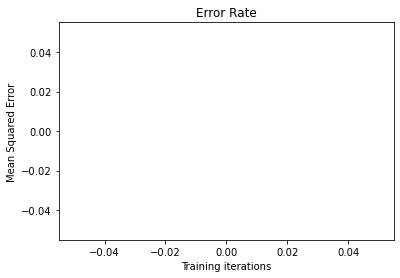

In [29]:
weights_bias,cost_history=train(bfeatures,targets,weights_bias,0.005,iters=10000)